In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing

----------------------------------------------

### Variables

##### Time - Number of seconds elapsed between this transaction and the first transaction in the dataset

##### V1-V28 - Confidential variables regarding the credit card information

##### Amount - Transaction amount

##### Class - 1 for fraudulent transactions, 0 otherwise

----------------------------------------------



In [2]:
df = pd.read_csv('./data/creditcard.csv', header=0)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# df = df.reset_index()

In [5]:
# df.head()

In [6]:
# df.set_index(df.columns[0], inplace=True)

In [7]:
# df.head()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
df.shape

(284807, 31)

In [11]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

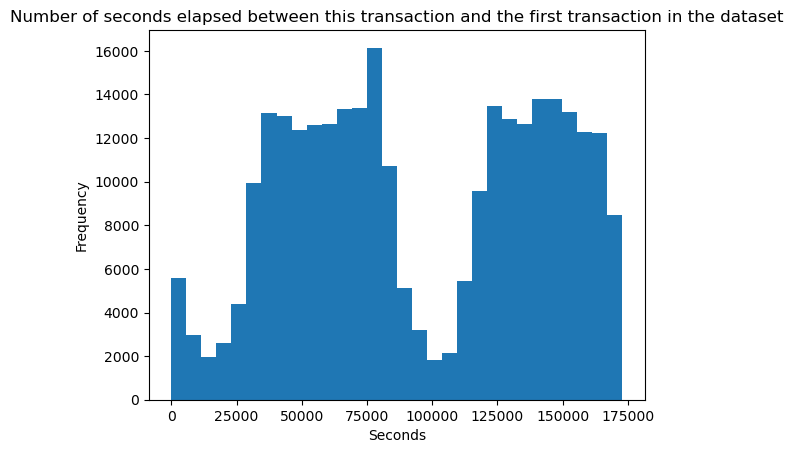

In [12]:
plt.hist(df['Time'] ,bins=30)
plt.xlabel('Seconds')
plt.ylabel('Frequency')
plt.title('Number of seconds elapsed between this transaction and the first transaction in the dataset')

# Show plot
plt.show()

## Do transactions at a certain time yield higher instances of fraud?

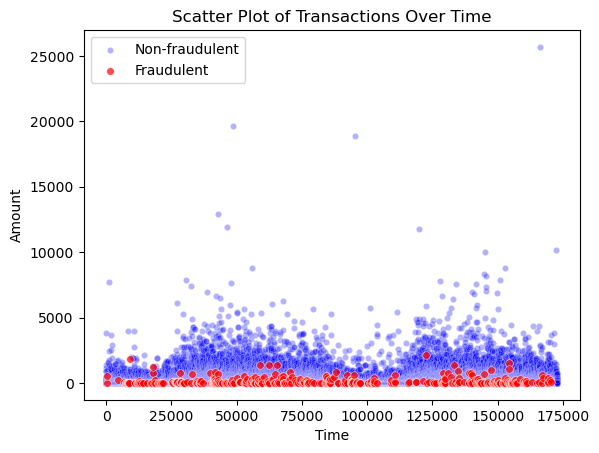

In [13]:
# sns.scatterplot(x=df['Time'], y=df['Amount'], data=df, hue="Class")
sns.scatterplot(x='Time', y='Amount', data=df[df['Class'] == 0], alpha=0.3, s=20, label='Non-fraudulent', color='blue')

# Plot the second class with higher alpha and size to make it more visible
sns.scatterplot(x='Time', y='Amount', data=df[df['Class'] == 1], alpha=0.7, s=30, label='Fraudulent', color='red')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Scatter Plot of Transactions Over Time')

# Adding a legend
plt.legend()

# Show the plot
plt.show()

## Nothing out of the ordinary, as we expect there seems to be peaks and troughs of transaction amounts, probably due to people more likely to make transactions during the day.

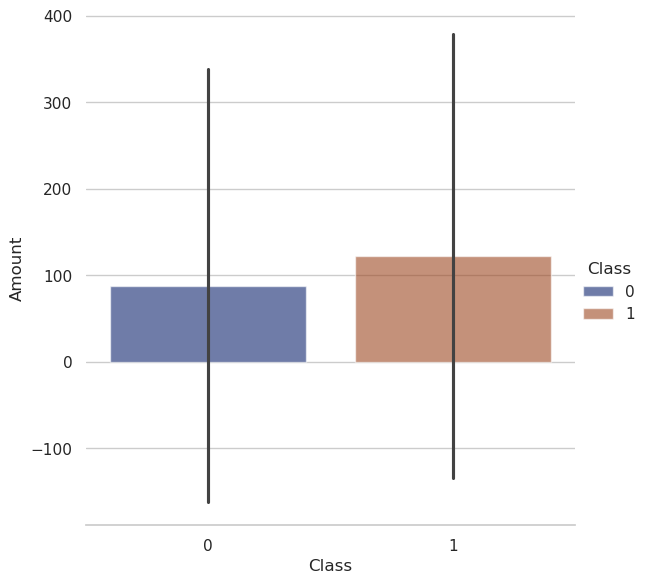

In [14]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="Class", y="Amount", hue = "Class",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
# g.set_axis_labels("", "Body mass (g)")
# g.legend.set_title("")


In [15]:
# import seaborn as sns
# sns.set_theme(style="whitegrid")

# # penguins = sns.load_dataset("penguins")

# # Draw a nested barplot by species and sex
# g = sns.countplot(
#     data=df,
#     x="Class", palette="dark", alpha=.6, height=6
# )
# # g.despine(left=True)
# # g.set_axis_labels("", "Body mass (g)")
# # g.legend.set_title("")


In [16]:
df['Class'].nunique()

2

<Axes: xlabel='Class', ylabel='count'>

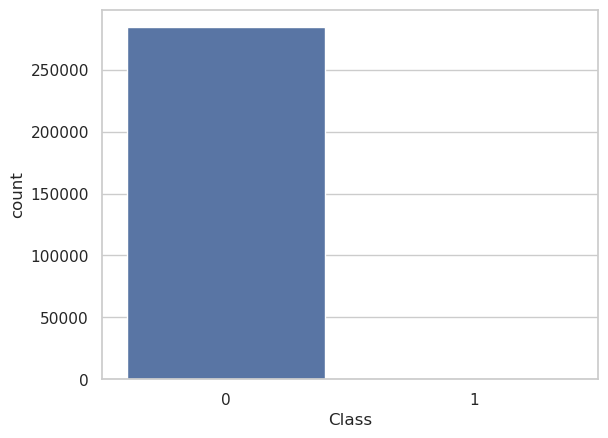

In [17]:
sns.countplot(df, x="Class")

In [18]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

# An incredibly imbalanced dataset. Let's look at the summary statistics of the non-fraudulent and fraudulent transactions in the Amount variable.

In [19]:
filter = df["Class"] == 0
not_fraudulent = df['Amount'].where(filter)
not_fraudulent.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

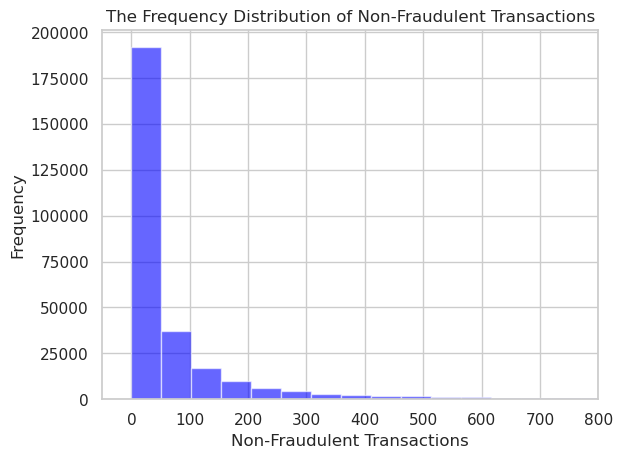

In [20]:
plt.hist(not_fraudulent, alpha=0.6, color='blue', bins = 500)
plt.xlabel('Non-Fraudulent Transactions')
plt.ylabel('Frequency')
plt.title('The Frequency Distribution of Non-Fraudulent Transactions')
plt.xlim(xmin = -50, xmax=800)
plt.show()

In [21]:
filter = (df["Class"] == 1)
fraudulent = df['Amount'].where(filter)
fraudulent.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

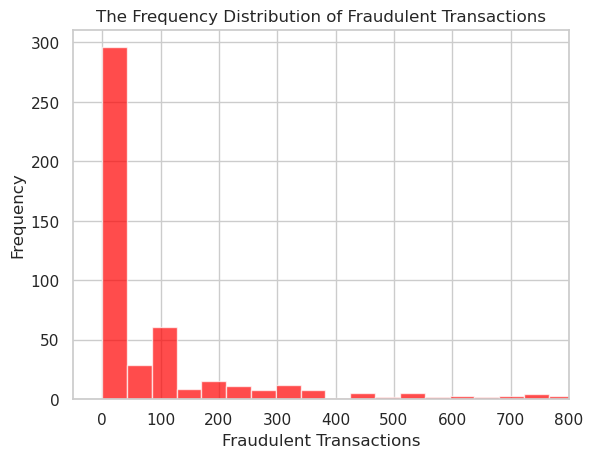

In [22]:
plt.hist(fraudulent, alpha=0.7, color='red', bins = 50)
plt.xlabel('Fraudulent Transactions')
plt.ylabel('Frequency')
plt.title('The Frequency Distribution of Fraudulent Transactions')
plt.xlim(xmin = -50, xmax=800)
plt.show()

## The non-fraudulent transactions have a tighter spread that is centered higher than the fraudulent transactions, which seem to vary more. A notable amount of points in both graphs are beyond the x limit I set and not able to be seen, but showing the whole picture would obscure the main points, while still not providing any glimpse whatsoever of the far off points.

In [23]:
X = df.drop(columns = ['Class'])
y = df['Class']

# Performing a single train-test split

In [24]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

# The data set is huge and heavily imbalanced, what can we do? The most basic and time efficient methods are undersampling, oversampling, and SMOTE. Let's try them first.

In [25]:
X.shape

(284807, 30)

In [26]:
y.shape

(284807,)

In [27]:
from imblearn.under_sampling import RandomUnderSampler as RU
ru = RU()
X_train, y_train = ru.fit_resample(X_train, y_train)

In [28]:
X_train.shape

(788, 30)

In [29]:
y_train.shape

(788,)

In [30]:
def plot_resampling_results(y_resampled, title):
    plt.figure(figsize = (4, 4))
    pd.Series(y_resampled).value_counts().plot.pie(autopct = '%1.1f%%', startangle = 90, colors = ['skyblue', 'lightcoral'])
    plt.title(title)
    plt.show()

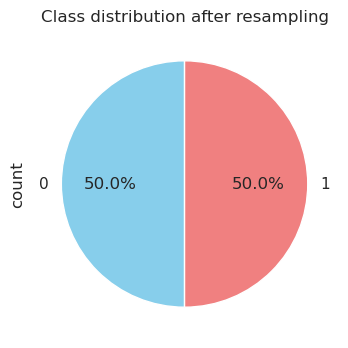

In [31]:
plot_resampling_results(y_train, 'Class distribution after resampling')

## Scaling the data

In [32]:
from sklearn.preprocessing import StandardScaler as SS
ss = SS()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Performing logistic regression


In [33]:
def compare_classes(actual, predicted, names=None):
    '''Function returns a confusion matrix, and overall accuracy given:
            Input:  actual - a list of actual classifications
                    predicted - a list of predicted classifications
                    names (optional) - a list of class names
    '''
    accuracy = sum(actual==predicted)/actual.shape[0]
    
    classes = pd.DataFrame(columns = ['Actual', 'Predicted'])
    classes['Actual'] = actual
    classes['Predicted'] = predicted

    conf_mat = pd.crosstab(classes['Actual'], classes['Predicted'])
    
    if type(names) != type(None):
        conf_mat.index = names
        conf_mat.index.name = 'Actual'
        conf_mat.columns = names
        conf_mat.columns.name = 'Predicted'
    
    print('Accuracy = ' + format(accuracy, '.2f'))
    return conf_mat, accuracy

In [34]:
from sklearn.linear_model import LogisticRegression as LR
log_reg = LR()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9771075453811313

In [35]:
compare_classes(y_train, log_reg.predict(X_train))

Accuracy = 0.95


(Predicted    0    1
 Actual             
 0          390    4
 1           33  361,
 0.9530456852791879)

In [36]:
compare_classes(y_test, log_reg.predict(X_test))

Accuracy = 0.98


(Predicted      0     1
 Actual                
 0          55569  1295
 1              9    89,
 0.9771075453811313)

In [37]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, log_reg.predict(X_test), average='macro')

(0.5320722119015363, 0.9426948149828305, 0.554255436078954, None)

## These are not good results. You can look at the 97.62% accuracy score and say the model is great, but that is misleading. The model has a great, which means it classifies the vast majority of the fraudulent transafctions correctly, however it classifies more than 1000 transactions incorrectly. Let's try some hyperparameter tuning to attempt to improve this.

In [38]:
C_range = np.linspace(0.001, 20, 10)

train_scores=[]
test_scores=[]

for C in C_range:
    log_reg = LR(C=C)
    log_reg.fit(X_train, y_train)
    train_scores.append(log_reg.score(X_train, y_train))
    test_scores.append(log_reg.score(X_test, y_test))

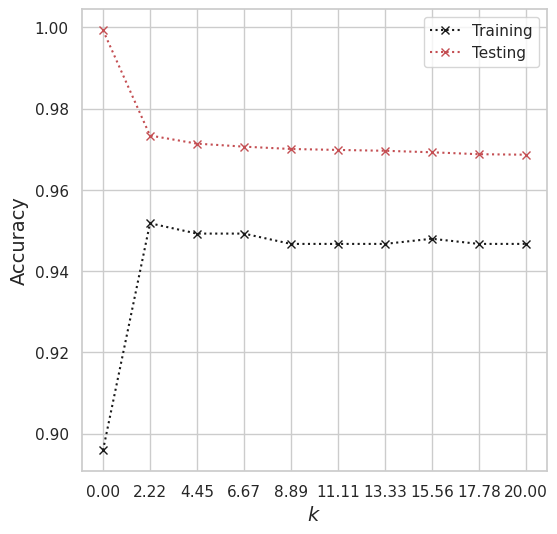

In [39]:
plt.figure(figsize=(6,6))
plt.plot(C_range, train_scores, ':xk', label='Training')
plt.plot(C_range, test_scores, ':xr', label='Testing')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('$k$',fontsize=14)
plt.xticks(C_range)
plt.legend()
plt.show()

In [40]:
np.argmax(test_scores)

0

In [41]:
test_scores[np.argmax(test_scores)]

0.9992626663389628

In [42]:
from sklearn.linear_model import LogisticRegression as LR
log_reg = LR(C = 0.001)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9992626663389628

## The lower C the better in this case

## Let's try some oversampling instead

In [43]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [44]:
from imblearn.over_sampling import RandomOverSampler as RO
ro = RO()
X_train, y_train = ro.fit_resample(X_train, y_train)

In [45]:
X_train.shape

(454902, 30)

In [46]:
y_train.shape

(454902,)

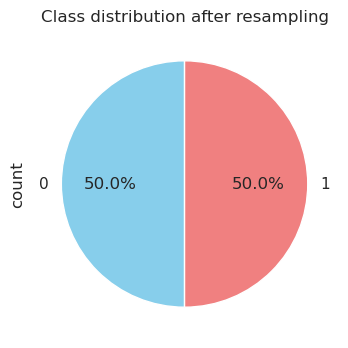

In [47]:
plot_resampling_results(y_train, 'Class distribution after resampling')

## Scaling the data

In [48]:
from sklearn.preprocessing import StandardScaler as SS
ss = SS()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Performing logistic regression

In [49]:
from sklearn.linear_model import LogisticRegression as LR
log_reg = LR()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9764755451002423

In [50]:
compare_classes(y_train, log_reg.predict(X_train))

Accuracy = 0.95


(Predicted       0       1
 Actual                   
 0          222259    5192
 1           19039  208412,
 0.9467335821781395)

In [51]:
compare_classes(y_test, log_reg.predict(X_test))

Accuracy = 0.98


(Predicted      0     1
 Actual                
 0          55532  1332
 1              8    90,
 0.9764755451002423)

In [52]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, log_reg.predict(X_test), average='macro')

(0.5315735494546068, 0.9474715181514362, 0.5532498843457528, None)

## Very similar performances

## Because of the size increase of the data, this is a MUCH more computationally expensive operation

In [ ]:
C_range = np.linspace(0.001, 3)

train_scores=[]
test_scores=[]

for C in C_range:
    log_reg = LR(C=C)
    log_reg.fit(X_train, y_train)
    train_scores.append(log_reg.score(X_train, y_train))
    test_scores.append(log_reg.score(X_test, y_test))

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(C_range, train_scores, ':xk', label='Training')
plt.plot(C_range, test_scores, ':xr', label='Testing')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('$k$',fontsize=14)
plt.xticks(C_range)
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
log_reg = LR(C = 0.001)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

## Now let's try SMOTE

In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE as SM
sm = SM()
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
plot_resampling_results(y_train, 'Class distribution after resampling')

## Scaling again

In [ ]:
from sklearn.preprocessing import StandardScaler as SS
ss = SS()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Performing logistic regression again

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
log_reg = LR()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

In [ ]:
compare_classes(y_train, log_reg.predict(X_train))

In [ ]:
compare_classes(y_test, log_reg.predict(X_test))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, log_reg.predict(X_test), average='macro')

In [ ]:
C_range = np.linspace(0.001, 3)

train_scores=[]
test_scores=[]

for C in C_range:
    log_reg = LR(C=C)
    log_reg.fit(X_train, y_train)
    train_scores.append(log_reg.score(X_train, y_train))
    test_scores.append(log_reg.score(X_test, y_test))

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(C_range, train_scores, ':xk', label='Training')
plt.plot(C_range, test_scores, ':xr', label='Testing')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('$k$',fontsize=14)
plt.xticks(C_range)
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
log_reg = LR(C = 0.001)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

# Performing PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
# pca_df = pd.DataFrame(pca_values, columns = ['PC'+str(i) for i in range(1,len(pca_values[0])+1)])

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca_df

In [ ]:

# Xtrain_pca = pca.fit_transform(Xtrain)
# Xtest_pca = pca.transform(Xtest)

# Get some colors
colors = get_colors(len(np.unique(y)))

# Show the training data
fig,ax = plot_groups(Xtrain_pca, ytrain, colors, alpha = 0.2)
# Show the testing data
plot_groups(Xtest_pca, y_pred, colors, ax=ax, alpha=0.9,s=50)
# Show which of the test points were incorrectly labeled
plot_groups(Xtest_pca[idx_wrong], y_pred[idx_wrong], colors, ax=ax, alpha=1, s=200)
ax.set_xlabel('PC1',fontsize=14)
ax.set_ylabel('PC2',fontsize=14)
h,l = ax.get_legend_handles_labels()
ax.get_legend().remove()
ax.legend(h[2:4], ['Malignant', 'Benign'], fontsize = 12, bbox_to_anchor = [1.2,0.5], loc = 'center')
plt.show()